The purpose of this file is to analyze the .txt files exported by the ATEX software

I want to plot my data in a way that is comparable to how Ernould chapter 4 plots his database

Plots 

When disorientation angle is varied: 
- Fig 2a - Max and Min error of von mises strain versus disorientation 
- Fig 9a  - Max relative error versus disortination, plotted for each of the von mises strain values as a line plot 
- Fig 9c - Relative error versus disorientation for each of the components as a scatter plot 


When strain is varied: 
- Fig 2b - Max and Min error of disorientation angle versus strain 
- Fig 9b - see above 

###  Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import conversions
import os
import ErnouldsMethod

Before you can read in the file make sure that the line DATA BEGIN is commented

# Inputs

In [2]:
#EMEBSD version 
#file that contains all of the deformation gradient data exported from Al_results visulalization
filename = '/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/results/EqualRotation_Dec142025_npyfiles/EqualRotation_homographies_Dec142025.npy'


#How many Rows and Columns were in the original EBSD scan?
Rows = 6
Columns = 58

#results folder path
foldername = f'/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/results/pyHREBSD_Dec192025/'

os.makedirs(foldername, exist_ok=True)

# Conversion to Homography to Strain

In [3]:
h = np.load(
        filename
    )

#h is in column major order convert h to row major order for comparison
h11 = h[:, 0]
h12 = h[:, 1]
h13 = h[:, 2]
h21 = h[:, 3]
h22 = h[:, 4]
h23 = h[:, 5]
h31 = h[:, 6]
h32 = h[:, 7]

#restack h in row major order
h_calc = np.stack((h11, h12, h13, h21, h22, h23, h31, h32), axis=1)


F = conversions.h2F(h_calc, np.array([0, 0, 800]))

#pring F shape
print(F.shape)
epsilon, omega = conversions.F2strain(F)



(348, 3, 3)


This is the code to read in a .csv file generated by pyHREBSD

In [4]:

e11 = epsilon[:, 0, 0]
e12 = epsilon[:, 0, 1]
e13 = epsilon[:, 0, 2]
e22 = epsilon[:, 1, 1]
e23 = epsilon[:, 1, 2]
e33 = epsilon[:, 2, 2]
w13 = omega[:, 0, 2]
w21 = omega[:, 1, 0]
w32 = omega[:, 2, 1]

#convert the rotation components to degrees
w13 = np.degrees(w13)
w21 = np.degrees(w21)
w32 = np.degrees(w32)


In [5]:
#reshape all components to Rows x Columns
e11 = e11.reshape((Rows, Columns))
e12 = e12.reshape((Rows, Columns))
e13 = e13.reshape((Rows, Columns))
e22 = e22.reshape((Rows, Columns))
e23 = e23.reshape((Rows, Columns))
e33 = e33.reshape((Rows, Columns))
w13 = w13.reshape((Rows, Columns))
w21 = w21.reshape((Rows, Columns))
w32 = w32.reshape((Rows, Columns))


# Plotting

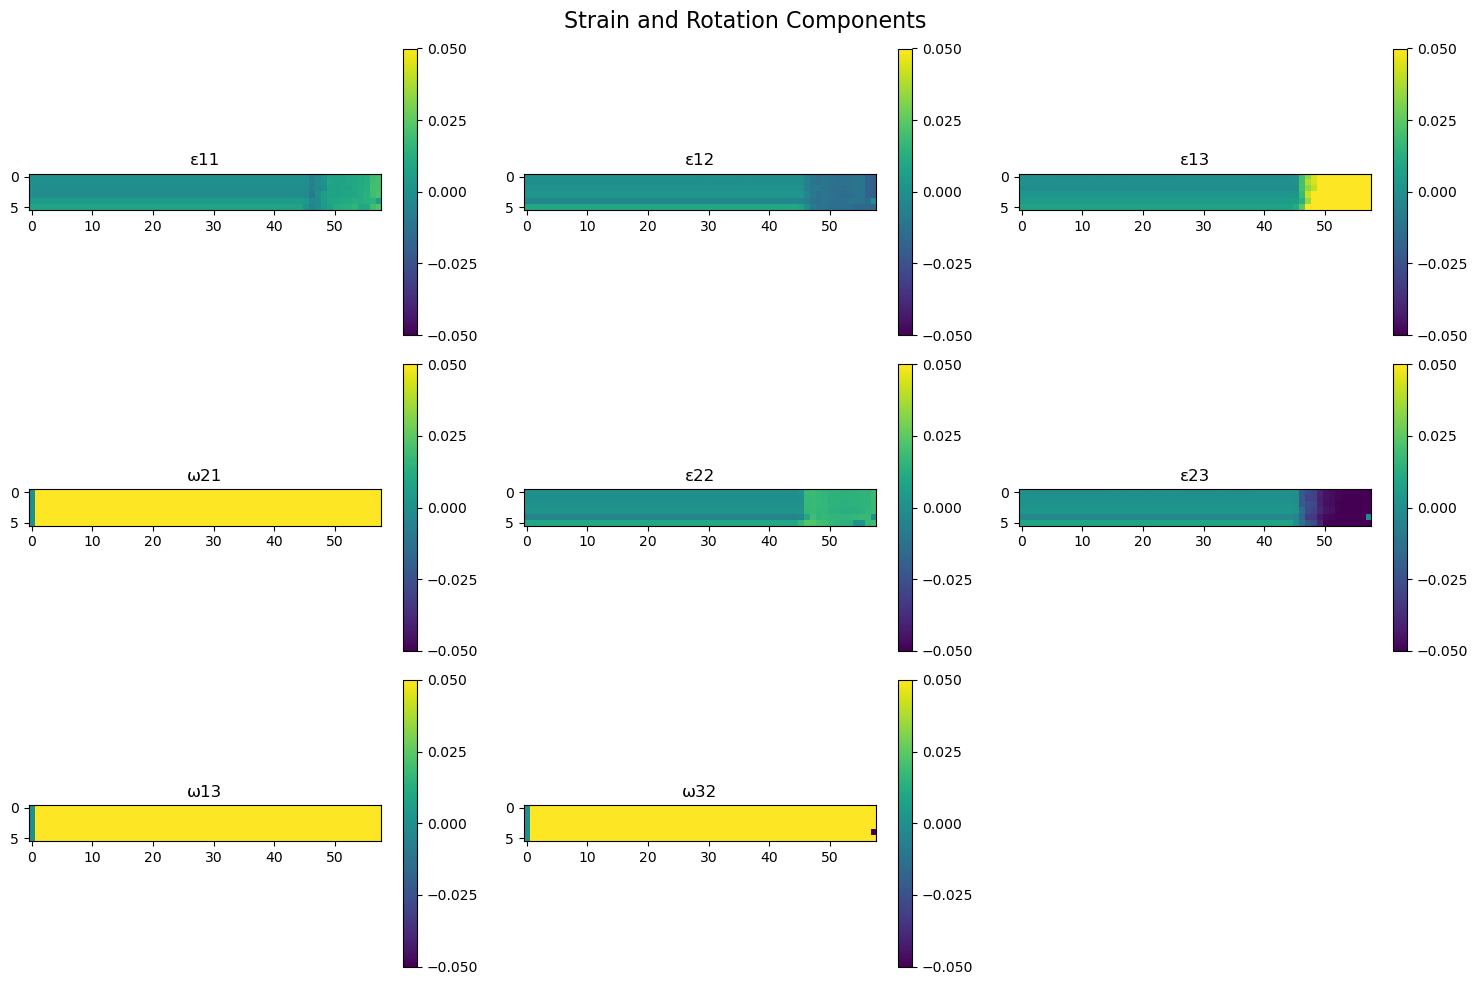

In [6]:

#plot strain components as subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

vmin = -5e-2
vmax = 5e-2

ax[0, 0].imshow(e11, cmap="viridis", vmin=vmin, vmax=vmax)
cb1 = fig.colorbar(ax[0,0].imshow(e11, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[0,0])
cb1.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[0, 0].set_title("ε11")
ax[0, 1].imshow(e12, cmap="viridis", vmin=vmin, vmax=vmax)
cb2 = fig.colorbar(ax[0,1].imshow(e12, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[0,1])
cb2.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[0, 1].set_title("ε12")
ax[0, 2].imshow(e13, cmap="viridis", vmin=vmin, vmax=vmax)
cb3 = fig.colorbar(ax[0,2].imshow(e13, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[0,2])
cb3.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[0, 2].set_title("ε13")
ax[1, 0].imshow(w21, cmap="viridis", vmin=vmin, vmax=vmax)
cb4 = fig.colorbar(ax[1,0].imshow(w21, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[1,0])
cb4.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[1, 0].set_title("ω21")
ax[1, 1].imshow(e22, cmap="viridis", vmin=vmin, vmax=vmax)
cb5 = fig.colorbar(ax[1,1].imshow(e22, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[1,1])
cb5.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[1, 1].set_title("ε22")
ax[1, 2].imshow(e23, cmap="viridis", vmin=vmin, vmax=vmax)
cb6 = fig.colorbar(ax[1,2].imshow(e23, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[1,2])
cb6.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[1, 2].set_title("ε23")
ax[2, 0].imshow(w13, cmap="viridis", vmin=vmin, vmax=vmax)
cb7 = fig.colorbar(ax[2,0].imshow(w13, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[2,0])
cb7.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[2, 0].set_title("ω13")
ax[2, 1].imshow(w32, cmap="viridis", vmin=vmin, vmax=vmax)
cb8 = fig.colorbar(ax[2,1].imshow(w32, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[2,1])
cb8.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[2, 1].set_title("ω32")
ax[2, 2].axis("off")
#set a supertitle
fig.suptitle(f"Strain and Rotation Components", fontsize=16)

plt.tight_layout()
plt.savefig(f"{foldername}/Strain_and_Rotation_Calculated - DETECTOR REFERENCE FRAME.png")

In [7]:
#also save each subplot individually
components = {
    "e11": e11,
    "e12": e12, 
    "e13": e13,
    "e22": e22,
    "e23": e23,
    "e33": e33,
    "w13": w13,
    "w21": w21,
    "w32": w32
}

for name, data in components.items():
    plt.figure(figsize=(6,5))
    plt.imshow(data, cmap="viridis", vmin=vmin, vmax=vmax)
    cb = plt.colorbar()
    cb.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
    plt.title(f"{name} Component")
    plt.savefig(f"{foldername}/{name}_Calculated - DETECTOR REFERENCE FRAME.png")
    plt.close()